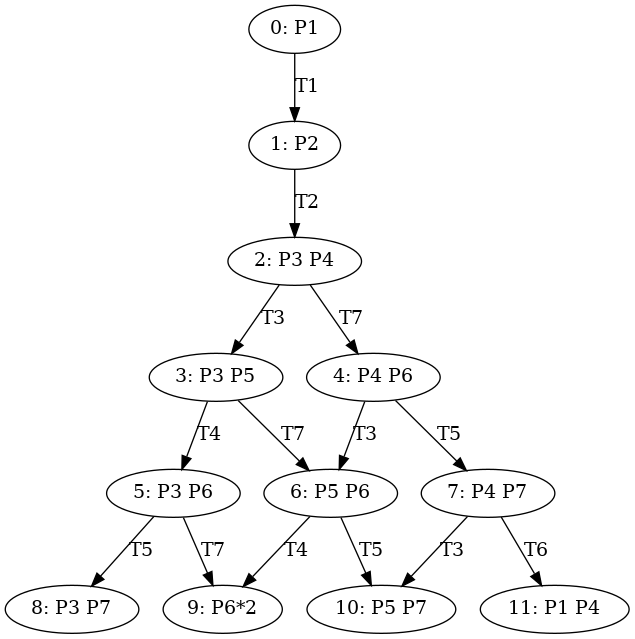

In [2]:
# Visualizes TiNA generated statespaces (txt format) 

import re
import graphviz
from IPython.display import Image

def parse_file(file_path):
    with open(file_path, 'r') as f:
        content = f.read()

    # markings
    markings_section = re.search(r"MARKINGS:\n(.*?)\n\n", content, re.DOTALL)
    markings = markings_section.group(1).strip().split("\n") if markings_section else []
    markings_dict = {int(m.split(":")[0].strip()): m.split(":")[1].strip() for m in markings}

    # transitions
    transitions_section = re.search(r"REACHABILITY GRAPH:\n(.*?)\n\n", content, re.DOTALL)
    transitions = transitions_section.group(1).strip().split("\n") if transitions_section else []
    edges = []
    for t in transitions:
        match = re.match(r"(\d+) -> (.+)", t)
        if match:
            start_node = int(match.group(1))
            transitions_data = match.group(2).split(", ")
            for transition in transitions_data:
                # Parse each transition (e.g., T1/1)
                parts = transition.split("/")
                if len(parts) == 2:
                    label, end_node = parts
                    edges.append((start_node, int(end_node), label.strip()))

    return markings_dict, edges

def generate_graph(markings_dict, edges, output_file="state_space"):
    dot = graphviz.Digraph(format="png")

    # markings
    for node, label in markings_dict.items():
        dot.node(str(node), f"{node}: {label}")

    # transitions
    for start, end, label in edges:
        dot.edge(str(start), str(end), label)

    # Render it
    output_path = dot.render(output_file, cleanup=True)
    return output_path

# File path from uploaded file
file_path = "example.txt"

# Parse the file and generate the graph
markings, edges = parse_file(file_path)
graph_path = generate_graph(markings, edges)
Image(graph_path)
